# CPG sites selection by applying PCA, Random Forest and Pearson Correlation
(Selected 10,000 cpg sites per samples)

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('D:\Courses\Biomedical_for_AI\GSE119144 data with labels.csv')

cpg_sites = data.drop(['Samples', 'PFS_event'], axis=1) 


scaler = StandardScaler()
cpg_sites_standardized = scaler.fit_transform(cpg_sites)

pca = PCA()
principal_components = pca.fit_transform(cpg_sites_standardized)

num_components = 10 


loading_scores = pd.DataFrame(pca.components_[:num_components, :], columns=cpg_sites.columns)


top_cpg_sites_pca = loading_scores.abs().sum(axis=0).sort_values(ascending=False).index


X_train, X_test, y_train, y_test = train_test_split(cpg_sites, data['PFS_event'], test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


feature_importances = pd.Series(rf_model.feature_importances_, index=cpg_sites.columns)


top_cpg_sites_rf = feature_importances.sort_values(ascending=False).index


subset_size = 1000
random_subset = cpg_sites.sample(n=subset_size, axis=0, replace=True).sample(n=subset_size, axis=1, replace=True)
correlation_matrix = random_subset.corr()



correlation_threshold = 0.8
highly_correlated_cpg_sites = (correlation_matrix.abs() > correlation_threshold).sum().sort_values(ascending=False).index


all_top_cpg_sites = set(top_cpg_sites_pca) | set(top_cpg_sites_rf) | set(highly_correlated_cpg_sites)


final_selected_cpg_sites = list(all_top_cpg_sites)[:10000]

# Display the final selected CpG sites
print("Final selected CpG sites:")
print(final_selected_cpg_sites)

# Save the final selected CpG sites to an Excel file
selected_cpg_sites_df = pd.DataFrame(final_selected_cpg_sites, columns=['Selected_CpG_Sites'])
selected_cpg_sites_df.to_excel('selected_cpg_sites.xlsx', index=False)


Final selected CpG sites:
['cg25358415', 'cg05678290', 'cg08870473', 'cg02924836', 'cg12560320', 'cg14198080', 'cg17322177', 'cg04438688', 'cg14195166', 'cg24962573', 'cg13734780', 'cg25741056', 'cg18328998', 'cg04964944', 'cg23353167', 'cg01893322', 'cg20646491', 'cg06002305', 'cg06617888', 'cg26140958', 'cg24084780', 'cg25711665', 'cg11969883', 'cg26705266', 'cg25922009', 'cg24025550', 'cg24248776', 'cg08088984', 'cg11567001', 'cg21419909', 'cg21910919', 'cg18710929', 'cg23901857', 'cg23674533', 'cg02366931', 'cg01836353', 'cg03937463', 'cg15131854', 'cg20012888', 'cg21678614', 'cg02688650', 'cg19506253', 'cg12908952', 'cg10739132', 'cg10318647', 'cg10712991', 'cg01063932', 'cg08516911', 'cg18949056', 'cg10920297', 'cg13634653', 'cg16778319', 'cg12785228', 'cg03207917', 'cg12705212', 'cg07301594', 'cg02546208', 'cg12100109', 'cg08314089', 'cg19303435', 'cg05180512', 'cg13772815', 'cg01081808', 'cg06699195', 'cg05384275', 'cg03805410', 'cg12211091', 'cg07365951', 'cg04408448', 'cg0903

# CPG sites selection by applying PCA, Random Forest and Pearson Correlation
Selecting 1000 cpg sites per sample

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data
data = pd.read_csv('D:\Courses\Biomedical_for_AI\GSE119144 data with labels.csv')

# Drop unnecessary columns for initial processing
cpg_sites = data.drop(['Samples', 'PFS_event'], axis=1)

# Standardize the data
scaler = StandardScaler()
cpg_sites_standardized = scaler.fit_transform(cpg_sites)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(cpg_sites_standardized)

# Choose the number of principal components based on your analysis of the explained variance plot
num_components = 10

# Get the loadings of the top principal components
loading_scores = pd.DataFrame(pca.components_[:num_components, :], columns=cpg_sites.columns)

# Identify the most important individual CpG sites based on the absolute sum of loadings
top_cpg_sites_pca = loading_scores.abs().sum(axis=0).sort_values(ascending=False).index

# Perform Random Forest to get feature importance
X_train, X_test, y_train, y_test = train_test_split(cpg_sites, data['PFS_event'], test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=cpg_sites.columns)

# Identify the most important individual CpG sites based on Random Forest feature importances
top_cpg_sites_rf = feature_importances.sort_values(ascending=False).index

# Perform correlation analysis (e.g., Pearson correlation) on a random subset
subset_size = 1000
random_subset = cpg_sites.sample(n=subset_size, axis=0, replace=True).sample(n=subset_size, axis=1, replace=True)
correlation_matrix = random_subset.corr()

# Identify the most correlated individual CpG sites
# You can choose a correlation threshold based on your analysis
correlation_threshold = 0.8
highly_correlated_cpg_sites = (correlation_matrix.abs() > correlation_threshold).sum().sort_values(ascending=False).index

# Combine results from different analyses
all_top_cpg_sites = set(top_cpg_sites_pca) | set(top_cpg_sites_rf) | set(highly_correlated_cpg_sites)

# Limit the number of selected CpG sites to 1000
final_selected_cpg_sites = set(list(all_top_cpg_sites)[:1000])

# Display the final selected CpG sites
print("Final selected CpG sites:")
print(final_selected_cpg_sites)

# Create a new DataFrame with 'Samples', selected CpG sites, and 'PFS_event'
new_data = data[['Samples', 'PFS_event']].copy()
new_data = pd.concat([new_data] * 1000, ignore_index=True)  # Repeat 'Samples' and 'PFS_event' for each CpG site
new_data = pd.concat([new_data, cpg_sites[list(final_selected_cpg_sites)]], axis=1)

# Save the new DataFrame to an Excel file
new_data.to_excel('revised_data_with_selected_cpg_sites.xlsx', index=False)


Final selected CpG sites:
{'cg25264299', 'cg13633754', 'cg01161829', 'cg00299736', 'cg13717725', 'cg08228715', 'cg19436804', 'cg01119259', 'cg23856293', 'cg18933620', 'cg15836635', 'cg17705343', 'cg01936915', 'cg05045104', 'cg01956521', 'cg16141690', 'cg14585013', 'cg12738049', 'cg02482497', 'cg27230044', 'cg09552399', 'cg00504010', 'cg07709181', 'cg13826852', 'cg04770593', 'cg20658709', 'cg13374648', 'cg11040505', 'cg04269497', 'cg04711042', 'cg18139178', 'cg14139669', 'cg18128272', 'cg19697827', 'cg18990835', 'cg21534206', 'cg15239745', 'cg03966949', 'cg21521453', 'cg10925937', 'cg01796593', 'cg05160771', 'cg10769985', 'cg13596520', 'cg02147224', 'cg03529595', 'cg26309194', 'cg05886984', 'cg03291265', 'cg05085682', 'cg18116971', 'cg03508666', 'cg03625372', 'cg03385147', 'cg04673873', 'cg10732536', 'cg22273471', 'cg13649658', 'cg18092047', 'cg23368976', 'cg12874181', 'cg06843180', 'cg12958020', 'cg17152205', 'cg07049329', 'cg07101702', 'cg20216557', 'cg06265020', 'cg22430463', 'cg0126

# Performing only Pearson Correlation

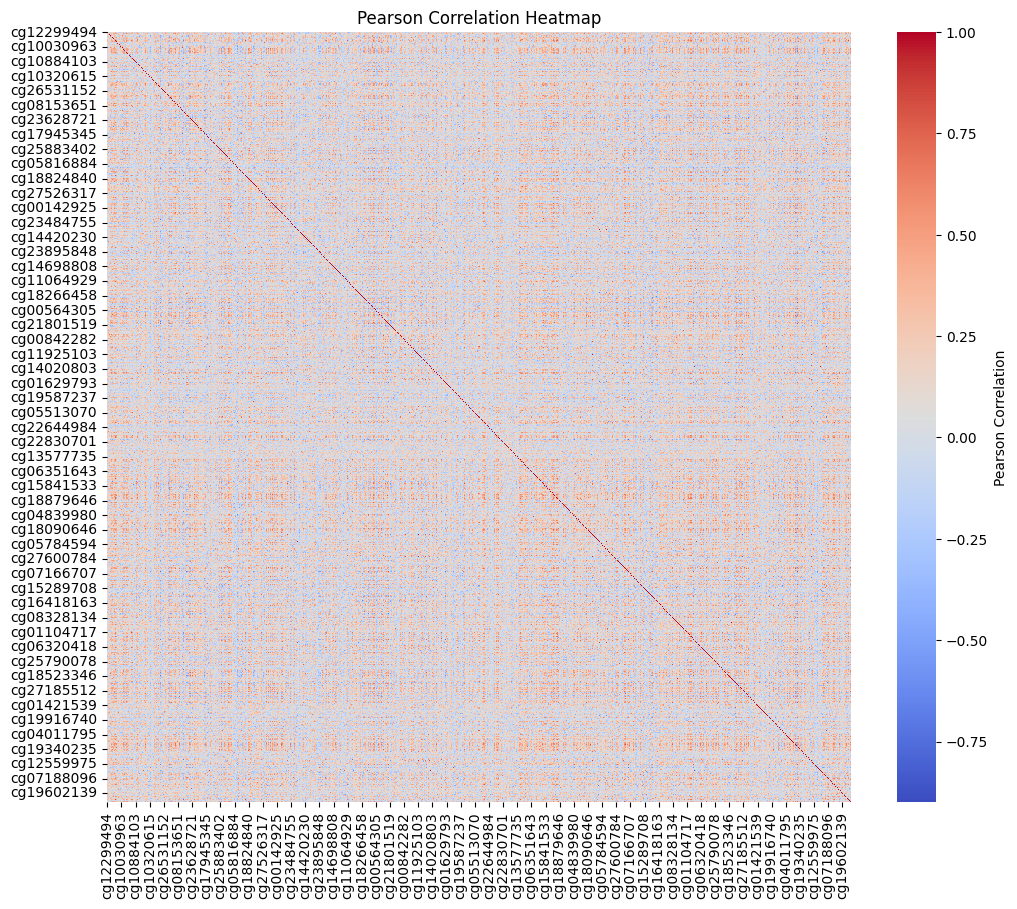

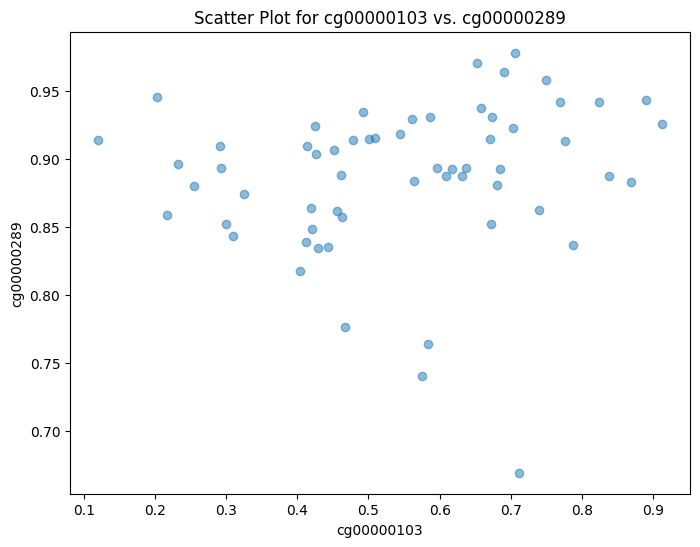

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a random subset of the data
subset_size = 1000
random_subset = cpg_sites.sample(n=subset_size, axis=0, replace=True).sample(n=subset_size, axis=1, replace=True)

# Calculate the correlation matrix
correlation_matrix = random_subset.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar_kws={'label': 'Pearson Correlation'})
plt.title('Pearson Correlation Heatmap')
plt.show()

# Example: Scatter plot for two specific CpG sites
cpg_site_1 = 'cg00000103'  # Replace with an actual CpG site
cpg_site_2 = 'cg00000289'  # Replace with another CpG site

plt.figure(figsize=(8, 6))
plt.scatter(cpg_sites[cpg_site_1], cpg_sites[cpg_site_2], alpha=0.5)
plt.title(f'Scatter Plot for {cpg_site_1} vs. {cpg_site_2}')
plt.xlabel(cpg_site_1)
plt.ylabel(cpg_site_2)
plt.show()

# Performing ElasticNet analysis

In [4]:

from sklearn.linear_model import ElasticNet
# Standardize the data
scaler = StandardScaler()
cpg_sites_standardized = scaler.fit_transform(cpg_sites)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cpg_sites_standardized, data['PFS_event'], test_size=0.2, random_state=42)

# Train a simple ElasticNet model
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed
elasticnet_model.fit(X_train, y_train)

# Extract coefficients from ElasticNet model
elasticnet_coefficients = pd.Series(elasticnet_model.coef_, index=cpg_sites.columns)

# Select the top features based on ElasticNet coefficients
top_cpg_sites_elasticnet = elasticnet_coefficients.abs().sort_values(ascending=False).index

# Display the top ElasticNet-selected CpG sites
print("Top ElasticNet-selected CpG sites:")
print(top_cpg_sites_elasticnet)
print(len(top_cpg_sites_elasticnet))

Top ElasticNet-selected CpG sites:
Index(['cg14185037', 'cg15333808', 'cg13837989', 'cg12159577', 'cg01117572',
       'cg15269432', 'cg12773941', 'cg17519750', 'cg14238622', 'cg23689517',
       ...
       'cg17475085', 'cg17475084', 'cg17475063', 'cg17474973', 'cg17474950',
       'cg17474934', 'cg17474933', 'cg17474924', 'cg17474920', 'cg00000029'],
      dtype='object', length=866091)
866091


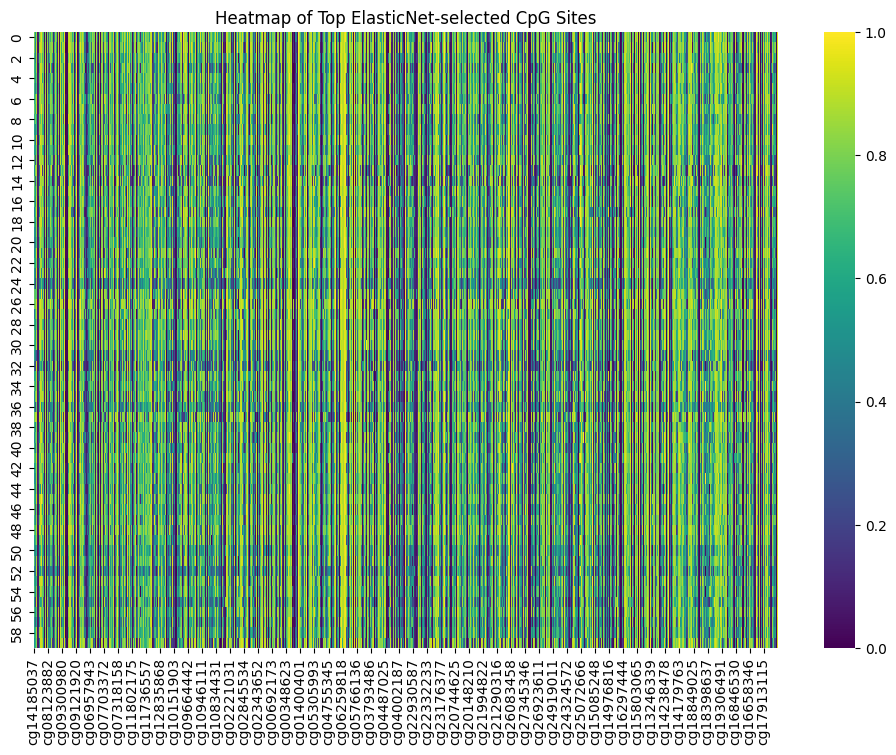

In [5]:
import seaborn as sns

# Extract the top CpG sites data
top_cpg_sites_data = cpg_sites[top_cpg_sites_elasticnet]

# Plot heatmap of the top CpG sites
plt.figure(figsize=(12, 8))
sns.heatmap(top_cpg_sites_data, cmap='viridis')
plt.title('Heatmap of Top ElasticNet-selected CpG Sites')
plt.show()

C:\Users\iNetLab\AppData\Local\Temp\ipykernel_8464\3584871451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cpg_sites_data['PFS_event'] = data['PFS_event']


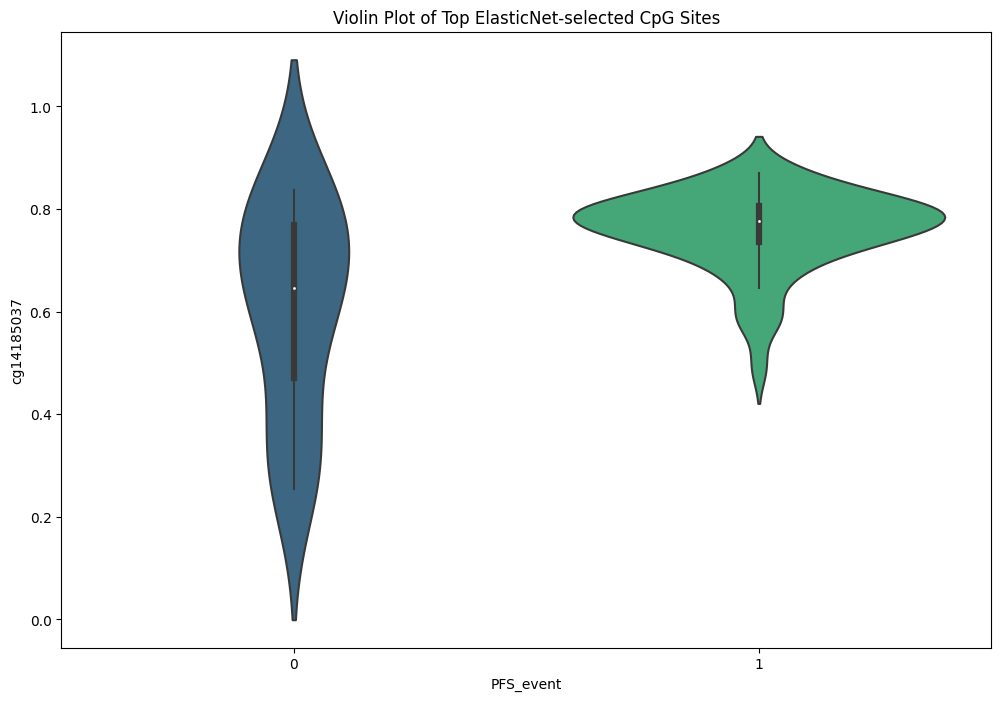

In [6]:
# Add PFS_event column to the top CpG sites data
top_cpg_sites_data['PFS_event'] = data['PFS_event']

# Plot violin plot for each CpG site
plt.figure(figsize=(12, 8))
sns.violinplot(x='PFS_event', y=top_cpg_sites_data.columns[0], data=top_cpg_sites_data, palette='viridis')
plt.title('Violin Plot of Top ElasticNet-selected CpG Sites')
plt.show()


# Applying Coefficient of Variation analysis

In [ ]:
# Extract CpG sites data
cpg_sites = data.drop(['Samples', 'PFS_event'], axis=1)

# Calculate the coefficient of variation for each CpG site
cv_values = cpg_sites.std(axis=0) / cpg_sites.mean(axis=0)

# Set a threshold for the coefficient of variation
cv_threshold = 0.9  # Adjust the threshold based on your criteria

# Select the top CpG sites based on the coefficient of variation exceeding the threshold
top_cpg_sites_cv = cv_values[cv_values > cv_threshold].index

# Display the top CpG sites based on the coefficient of variation threshold
print("Top CpG sites based on Coefficient of Variation:")
print(top_cpg_sites_cv)

# Plot the coefficient of variation for all CpG sites
plt.figure(figsize=(12, 6))
plt.bar(range(len(cv_values)), cv_values)
plt.axhline(y=cv_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('CpG Sites')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of Variation for All CpG Sites')
plt.xticks(range(len(cpg_sites.columns)), cpg_sites.columns, rotation='vertical')
plt.legend()
plt.show()

Top CpG sites based on Coefficient of Variation:
Index(['cg00000974', 'cg00005010', 'cg00006948', 'cg00007300', 'cg00008945',
       'cg00009364', 'cg00009916', 'cg00011200', 'cg00011891', 'cg00011994',
       ...
       'ch.15.1166704F', 'ch.16.1163115F', 'ch.17.73175810F', 'ch.18.1002961R',
       'ch.2.80942047R', 'ch.22.48274842R', 'ch.3.3371471R', 'ch.5.2843133R',
       'ch.X.7566543R', 'ch.X.92448175R'],
      dtype='object', length=37142)


# Using random forest to select cpg sites

In [40]:
# Assuming 'PFS_event' is your target variable
target_variable = 'PFS_event'

# Separate features (X) and target variable (y)
X = data.drop(columns=['Samples', target_variable])
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_features = 50000  # You can adjust this number
print(f"Top {top_features} Important Features:")
print(feature_importance_df.head(top_features))

# Count the number of features with non-zero importance
num_non_zero_features = (feature_importance_df['Importance'] > 0).sum()

# Display the count
print(f"Number of features with non-zero importance: {num_non_zero_features}")


Top 50000 Important Features:
           Feature  Importance
614629  cg18772071    0.008537
198726  cg05815042    0.008140
205454  cg06013042    0.008140
440290  cg13277159    0.007895
565041  cg17087331    0.007895
...            ...         ...
555234  cg16767192    0.000000
555235  cg16767220    0.000000
555236  cg16767221    0.000000
555237  cg16767274    0.000000
555238  cg16767307    0.000000

[50000 rows x 2 columns]
Number of features with non-zero importance: 276


# Performing only Principal Component Analysis (PCA) first

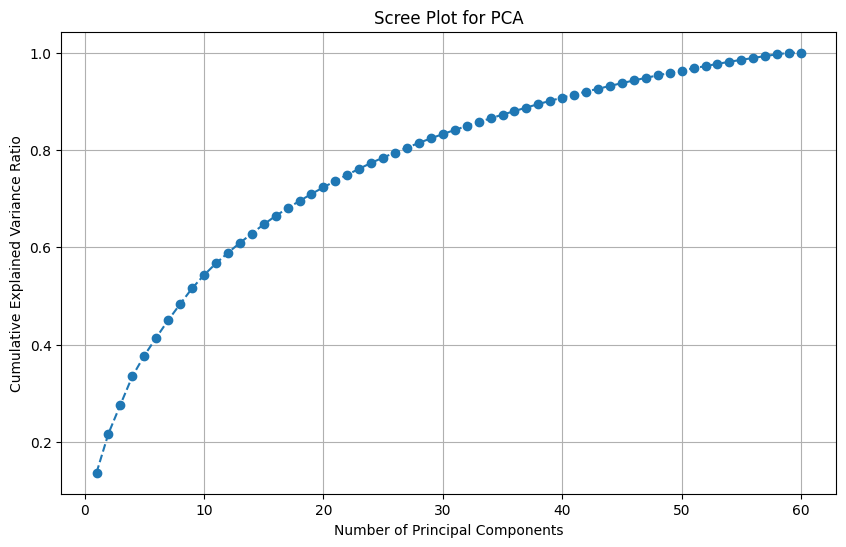

In [50]:
import matplotlib.pyplot as plt
# Extract CpG sites data
cpg_sites = data.drop(['Samples', 'PFS_event'], axis=1)

# Standardize the data
scaler = StandardScaler()
cpg_sites_standardized = scaler.fit_transform(cpg_sites)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(cpg_sites_standardized)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Training Logistic Regression model on selected cpg sites

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the revised data with selected CpG sites
revised_data = pd.read_excel('revised_data_with_selected_cpg_sites.xlsx', engine='openpyxl')

# Separate features (CpG sites) and target variable
X = revised_data.drop(['Samples', 'PFS_event'], axis=1)
y = revised_data['PFS_event']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_standardized, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8333333333333334

Confusion Matrix:
 [[ 0  1]
 [ 1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      0.91      0.91        11

    accuracy                           0.83        12
   macro avg       0.45      0.45      0.45        12
weighted avg       0.83      0.83      0.83        12



# Checking for the number of samples 1's and 0's

In [7]:
pfs_events=revised_data['PFS_event'].value_counts()
print(pfs_events)

1    49
0    11
Name: PFS_event, dtype: int64


# Trying with oversampling

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load the revised data with selected CpG sites
revised_data = pd.read_excel('revised_data_with_selected_cpg_sites.xlsx', engine='openpyxl')

# Separate features (CpG sites) and target variable
X = revised_data.drop(['Samples', 'PFS_event'], axis=1)
y = revised_data['PFS_event']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomOverSampler to balance the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Standardize the resampled data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_resampled)
X_test_standardized = scaler.transform(X_test)

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the resampled data
logistic_model.fit(X_train_standardized, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8333333333333334

Confusion Matrix:
 [[ 0  1]
 [ 1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      0.91      0.91        11

    accuracy                           0.83        12
   macro avg       0.45      0.45      0.45        12
weighted avg       0.83      0.83      0.83        12



# Predicting cross validation accuracy

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

# Load the revised data with selected CpG sites
revised_data = pd.read_excel('revised_data_with_selected_cpg_sites.xlsx', engine='openpyxl')

# Separate features (CpG sites) and target variable
X = revised_data.drop(['Samples', 'PFS_event'], axis=1)
y = revised_data['PFS_event']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Perform cross-validation
cv_accuracy = cross_val_score(logistic_model, X_train_standardized, y_train, cv=5, scoring=make_scorer(accuracy_score))

# Display the cross-validation results
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_accuracy.mean(), cv_accuracy.std() * 2))


Cross-Validation Accuracy: 0.75 (+/- 0.11)


# Applying Random Forest to the selected cpg sites

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
revised_data = pd.read_excel('revised_data_with_selected_cpg_sites.xlsx', engine='openpyxl')

# Separate features (CpG sites) and target variable
X = revised_data.drop(['Samples', 'PFS_event'], axis=1)
y = revised_data['PFS_event']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train_standardized, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_standardized)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display the evaluation metrics for Random Forest
print("Random Forest Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", classification_rep_rf)

# Perform cross-validation and display the mean accuracy
cv_scores_rf = cross_val_score(random_forest_model, X_train_standardized, y_train, cv=5)
mean_cv_accuracy_rf = cv_scores_rf.mean()
print("\nCross-Validation Mean Accuracy for Random Forest:", mean_cv_accuracy_rf)


C:\Users\iNetLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iNetLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iNetLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Accuracy: 0.9166666666666666

Confusion Matrix:
 [[ 0  1]
 [ 0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        11

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12


Cross-Validation Mean Accuracy for Random Forest: 0.7711111111111111


# Applying Logistic Regression to predict Gender on validation set of melanoma

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_excel('new_melanoma_meta.xlsx', engine='openpyxl')

# Convert 'Tissue in relation to ICI' column to numerical values
data['Tissue in relation to ICI'] = data['Tissue in relation to ICI'].map({'pre-ICI': 0, 'post-ICI': 1})

# Select features and target variable
X = data.drop(['Patient ID', 'Sex', 'Val', 'ICI response'], axis=1)
y = data['Sex']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Create and train the logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_standardized, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Logistic Regression Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Logistic Regression Accuracy: 0.7692307692307693

Confusion Matrix:
 [[5 1]
 [2 5]]

Classification Report:
               precision    recall  f1-score   support

      female       0.71      0.83      0.77         6
        male       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



# Applying Random Forest to predict Gender on validation set of melanoma 

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_excel('new_melanoma_meta.xlsx', engine='openpyxl')

# Convert 'Tissue in relation to ICI' column to numerical values
data['Tissue in relation to ICI'] = data['Tissue in relation to ICI'].map({'pre-ICI': 0, 'post-ICI': 1})

# Handle missing values
X = data.drop(['Patient ID', 'Sex', 'Val', 'ICI response'], axis=1)
y = data['Sex']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train_standardized, y_train)

# Make predictions on the test set using Random Forest
y_pred_rf = random_forest_model.predict(X_test_standardized)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display the evaluation metrics for Random Forest
print("Random Forest Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", classification_rep_rf)

# Perform cross-validation and display the mean accuracy for Random Forest
cv_scores_rf = cross_val_score(random_forest_model, X_train_standardized, y_train, cv=5)
mean_cv_accuracy_rf = cv_scores_rf.mean()
print("\nCross-Validation Mean Accuracy for Random Forest:", mean_cv_accuracy_rf)

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
logistic_regression_model.fit(X_train_standardized, y_train)

# Make predictions on the test set using Logistic Regression
y_pred_lr = logistic_regression_model.predict(X_test_standardized)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

# Display the evaluation metrics for Logistic Regression
print("\nLogistic Regression Accuracy:", accuracy_lr)
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", classification_rep_lr)

# Perform cross-validation and display the mean accuracy for Logistic Regression
cv_scores_lr = cross_val_score(logistic_regression_model, X_train_standardized, y_train, cv=5)
mean_cv_accuracy_lr = cv_scores_lr.mean()
print("\nCross-Validation Mean Accuracy for Logistic Regression:", mean_cv_accuracy_lr)


Random Forest Accuracy: 0.6153846153846154

Confusion Matrix:
 [[3 3]
 [2 5]]

Classification Report:
               precision    recall  f1-score   support

      female       0.60      0.50      0.55         6
        male       0.62      0.71      0.67         7

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.61      0.62      0.61        13


Cross-Validation Mean Accuracy for Random Forest: 0.5

Logistic Regression Accuracy: 0.7692307692307693

Confusion Matrix:
 [[5 1]
 [2 5]]

Classification Report:
               precision    recall  f1-score   support

      female       0.71      0.83      0.77         6
        male       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13


Cross-Validation Mean Accuracy for Logistic Regression: 0.6345454545454545
